# CVPR ASSIGNMENT
##### -Zafrin sultana; 19-39345-1

A machine learning model will be implemented to classify different objects. For this task,the CIFAR-10 dataset will be used.Once the dataset will be downloaded,all the training images and store in a list along with the corresponding labels need to be read. Then the test images will be used to test and compute the distance (Manhattan / Euclidian) of each image for the training images. Then KNN needs to be applied to do the prediction.

### Importing libraries

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import data_utils
import download
%matplotlib inline

### Downloading the CIFAR-10 dataset

In [2]:
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz" #link of the dataset
download_dir = "./data"
download.maybe_download_and_extract(url,download_dir)

Data has apparently already been downloaded and unpacked.


### Reading information about data

In [3]:
cifar10_dir = './data/cifar-10-batches-py' #dataset direction
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir) #reading training and testing data

# Checking the size of the training and testing data
print('Training dataset shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Test dataset shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training dataset shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test dataset shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


### Visulalize dataset

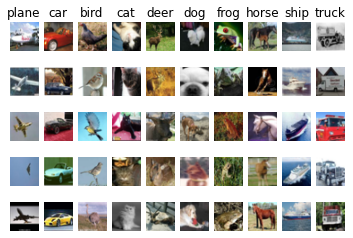

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #classes of the data
num_classes = len(classes) #number of class
samples_per_class = 5 
#visualizing 5 sample of each class
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Data subsampling

In [5]:
# Memory error prevention by subsampling data
#taking 50000 training data and 1,000 test data
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [6]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)


(5000, 3072) (1000, 3072)


### Applying KNN

The kNN classifier consists of two stages:

=> During training, the classifier takes the training data and simply remembers it

=> During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
The value of k is cross-validated

In [7]:
#KNN class
class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, X, y): #traning the data
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1, num_loops=0): #predicting class
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Value is invalid %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)
    

    def compute_distances(self, X): #calculating distances of the data
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))
        pass
        return dists

    def predict_labels(self, dists, k=1): #predicting class label according to the shape
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:k]])
            pass
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
            pass
        return y_pred

In [11]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = (float(num_correct) / num_test)*100
print('Successfully got %d / %d correct => accuracy: %f in percentage' % (num_correct, num_test, accuracy))
#average accuracy

Successfully got 280 / 1000 correct => accuracy: 28.000000 in percentage


In [9]:
num_folds = 5 #number of fold to be made for KNN
k_choices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] #value of K point
#training k fold values for x,y
X_train_folds = []
y_train_folds = []
#spliting the array
X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)
k_to_accuracies = {}

for k in k_choices:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        classifier = KNearestNeighbor()
        classifier.train(X_train, y_train)
        dists = classifier.compute_distances(X_test)
        y_test_pred = classifier.predict_labels(dists, k)

        num_correct = np.sum(y_test_pred == y_test)
        accuracy = (float(num_correct) / num_test)*100
        k_to_accuracies[k].append(accuracy)


print("Printing the 5-fold accuracies in percentage for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

Printing the 5-fold accuracies in percentage for varying values of k:

k = 1, accuracy = 26.300000
k = 1, accuracy = 25.700000
k = 1, accuracy = 26.400000
k = 1, accuracy = 27.800000
k = 1, accuracy = 26.600000
k = 2, accuracy = 23.500000
k = 2, accuracy = 21.900000
k = 2, accuracy = 23.400000
k = 2, accuracy = 24.700000
k = 2, accuracy = 25.200000
k = 3, accuracy = 23.900000
k = 3, accuracy = 24.900000
k = 3, accuracy = 24.000000
k = 3, accuracy = 26.600000
k = 3, accuracy = 25.400000
k = 4, accuracy = 25.900000
k = 4, accuracy = 27.000000
k = 4, accuracy = 26.900000
k = 4, accuracy = 29.400000
k = 4, accuracy = 27.200000
k = 5, accuracy = 24.800000
k = 5, accuracy = 26.600000
k = 5, accuracy = 28.000000
k = 5, accuracy = 29.200000
k = 5, accuracy = 28.000000
k = 6, accuracy = 25.300000
k = 6, accuracy = 27.700000
k = 6, accuracy = 27.400000
k = 6, accuracy = 27.300000
k = 6, accuracy = 28.200000
k = 7, accuracy = 26.100000
k = 7, accuracy = 27.900000
k = 7, accuracy = 26.800000
k = 7

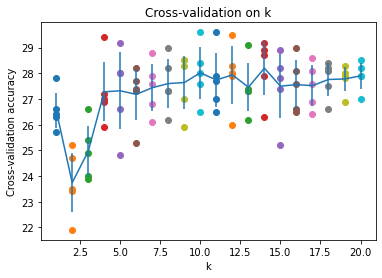

In [10]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

## ABOUT KNN

KNN is a model that classifies data points based on the points that are most similar to it. It uses test data to make a Prediction on what an unclassified point should be classified as.K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity.This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm. The stored data is known as training set and the new dataset which needs to be classify is known as test set.

The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors.

Step-2: Calculate the Euclidean distance of K number of neighbors.

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Finally model is ready.

## RESULT & ANALYSIS

There is no particular way to determine the best value for "K", so we need to try some values to find the best out of them. The most preferred value for K is 5 and so For cross validation value of K was taken as 5. Because a very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.

Finally after Implementing the algorithm, the average accuracy we have got is 28%. After plotting the value for k from 1 to 20, it is clearly seen that the range of accuracy is from 21-29%.the highest accuracy came for the value of K=14 with above 28%. As the accuracy of KNN varies on the dataset,considering the percentage of accuracy its clearly seen that this algorithm is not suitable for the classification of the "CIFAR-10" dataset.

## Is KNN a good choice or bad choice?

KNN works well with a small number of input variables, but struggles when the number of inputs is very large. As this 'CIFAR-10' dataset is too lagre, the KNN algorithm couldn't perform well for classification.So it has been proven as a bad dchoice for the task.

In this case, Neural network method can be proven to be very useful technique for statistical analysis of a leaned big data set.A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.Neural networks rely on training data to learn and improve their accuracy over time.


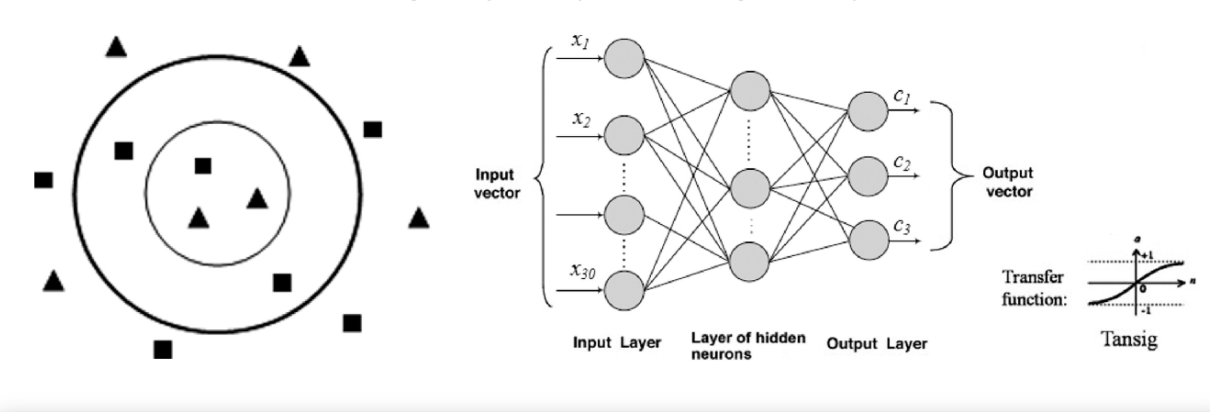